In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2

In [15]:
class LogisticRegression:
    def __init__(self, numOfIteration, lr, w = None):
        self.w = w
        self.numOfIteration = numOfIteration
        self.lr = lr
        
    def coef(self):
        return self.w
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, x, y):
        N, d = x.shape
        x = np.hstack((np.ones((N, 1)), x))
        self.w = np.array([0.,0.1,0.1]).reshape(-1,1)
        for i in range(1, self.numOfIteration):
            y_predict = self.sigmoid(np.dot(x, self.w))
            cost = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
            self.w = self.w - self.lr * np.dot(x.T, y_predict - y)

# 3

In [16]:
df = pd.read_csv('C:Downloads/dataset.csv').values

In [17]:
df

array([[10.  ,  1.  ,  1.  ],
       [ 5.  ,  2.  ,  1.  ],
       [ 6.  ,  1.8 ,  1.  ],
       [ 7.  ,  1.  ,  1.  ],
       [ 8.  ,  2.  ,  1.  ],
       [ 9.  ,  0.5 ,  1.  ],
       [ 4.  ,  3.  ,  1.  ],
       [ 5.  ,  2.5 ,  1.  ],
       [ 8.  ,  1.  ,  1.  ],
       [ 4.  ,  2.5 ,  1.  ],
       [ 8.  ,  0.1 ,  0.  ],
       [ 7.  ,  0.15,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.8 ,  0.  ],
       [ 7.  ,  0.3 ,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.5 ,  0.  ],
       [ 6.  ,  0.3 ,  0.  ],
       [ 7.  ,  0.2 ,  0.  ],
       [ 8.  ,  0.15,  0.  ]])

In [18]:
N, d = df.shape
x = df[:, 0:d-1].reshape(-1, d-1)
y = df[:, 2].reshape(-1, 1)

In [19]:
model = LogisticRegression(numOfIteration=1000, lr = 0.01)

In [20]:
model.fit(x, y)

In [21]:
model.coef()

array([[-7.25683504],
       [ 0.62975152],
       [ 3.6436906 ]])

# 5

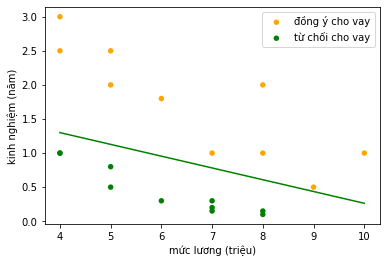

In [30]:
cho_vay = x[y[:,0]==1]
tu_choi = x[y[:,0]==0]

plt.scatter(cho_vay[:, 0], cho_vay[:, 1], c='orange', edgecolors='none', s=30, label='đồng ý cho vay')
plt.scatter(tu_choi[:, 0], tu_choi[:, 1], c='green', edgecolors='none', s=30, label='từ chối cho vay')
plt.legend(loc=1)

plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

t = 0.5
plt.plot((4, 10),(-(model.w[0]+4*model.w[1]+ np.log(1/t-1))/model.w[2], -(model.w[0] + 10 * model.w[1]+ np.log(1/t-1))/model.w[2]), 'g')
plt.show()